# Milestone 2 Phase 2

_Milestone_ ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1.

_Milestone_ ini dibuat oleh Risqi Rahmatullah Batch 007.
Uji coba model (_model inference_) dalam tugas ini dapat dilihat dalam website ini: https://lol-matchpred.herokuapp.com/

## Deskripsi Data
League of Legends is a MOBA (multiplayer online battle arena) where 2 teams (blue and red) face off. There are 3 lanes, a jungle, and 5 roles. The goal is to take down the enemy Nexus to win the game.

This dataset contains the first 10min. stats of approx. 10k ranked games (SOLO QUEUE) from a high ELO (DIAMOND I to MASTER). Players have roughly the same level. Each game is unique. The gameId can help you to fetch more attributes from the Riot API. There are 19 features per team (38 in total) collected after 10min in-game. This includes kills, deaths, gold, experience, level, etc. The column blueWins is the target value (the value we are trying to predict). A value of 1 means the blue team has won. 0 otherwise.

### Atribut Data
- gameId: Unique RIOT ID of the game. Can be used with the Riot Games API..  
- blueWins: The target column. 1 if the blue team has won, 0 otherwise..  
- blueWardsPlaced: Number of warding totems placed by the blue team on the map.  
- blueWardsDestroyed: Number of enemy warding totems the blue team has destroyed.  
- blueFirstBlood: First kill of the game. 1 if the blue team did the first kill, 0 otherwise.  
- blueKills: Number of enemies killed by the blue team.  
- blueDeaths: Number of deaths (blue team).  
- blueAssists: Number of kill assists (blue team).  
- blueEliteMonsters: Number of elite monsters killed by the blue team (Dragons and Heralds).  
- blueDragons: Number of dragons killed by the blue team.  
- blueHeralds: Number of heralds killed by the blue team.  
- blueTowersDestroyed: Number of structures destroyed by the blue team (towers...).  
- blueTotalGold: Blue team total gold.  
- blueAvgLevel: Blue team average champion level.  
- blueTotalExperience: Blue team total experience.  
- blueTotalMinionsKilled: Blue team total minions killed (CS).  
- blueTotalJungleMinionsKilled: Blue team total jungle monsters killed.  
- blueGoldDiff: Blue team gold difference compared to the enemy team.  
- blueExperienceDiff: Blue team experience difference compared to the enemy team.  
- blueCSPerMin: Blue team CS (minions) per minute.  
- blueGoldPerMin: Blue team gold per minute.  
- redWardsPlaced: Number of warding totems placed by the red team on the map.  
- redWardsDestroyed: Number of enemy warding totems the red team has destroyed.  
- redFirstBlood: First kill of the game. 1 if the red team did the first kill, 0 otherwise.  
- redKills: Number of enemies killed by the red team.  
- redDeaths: Number of deaths (red team).  
- redAssists: Number of kill assists (red team).  
- redEliteMonsters: Number of elite monsters killed by the red team (Dragons and Heralds).  
- redDragons: Number of dragons killed by the red team.  
- redHeralds: Number of heralds killed by the red team.  
- redTowersDestroyed: Number of structures destroyed by the red team (towers...).  
- redTotalGold: Red team total gold.  
- redAvgLevel: Red team average champion level.  
- redTotalExperience: Red team total experience.  
- redTotalMinionsKilled: Red team total minions killed (CS).  
- redTotalJungleMinionsKilled: Red team total jungle monsters killed.  
- redGoldDiff: Red team gold difference compared to the enemy team.  
- redExperienceDiff: Red team experience difference compared to the enemy team.  
- redCSPerMin: Red team CS (minions) per minute.  
- redGoldPerMin: Red team gold per minute.

### Glosarium Data
- Champions: the player-controlled characters in League of Legends.
- Warding totem: An item that a player can put on the map to reveal the nearby area. Very useful for map/objectives control.
- Minions: NPC that belong to both teams. They give gold when killed by players.
- Jungle minions: NPC that belong to NO TEAM. They give gold and buffs when killed by players.
- Elite monsters: Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team.
- Dragons: Elite monster which gives team bonus when killed. The 4th dragon killed by a team gives a massive stats bonus. The 5th dragon (Elder Dragon) offers a huge advantage to the team.
- Herald: Elite monster which gives stats bonus when killed by the player. It helps to push a lane and destroys structures.
- Towers: Structures you have to destroy to reach the enemy Nexus. They give gold.
- Level: Champion level. Start at 1. Max is 18.

Sumber data: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

## _Libraries_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import pickle
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, precision_score, roc_auc_score, make_scorer

## Pemuatan Data

In [2]:
lol_df = pd.read_csv('high_diamond_ranked_10min.csv')
lol_df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
lol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

## Exploratory Data Analysis (EDA)

In [4]:
# ringkasan informasi statistik
display(lol_df.describe().iloc[:,:20])
display(lol_df.describe().iloc[:,20:])

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000


,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


### Status pemain dan objektif pertandingan

Dominasi sebuah tim dalam pertandingan dapat dilihat dari KDA (Kill, Death, Assists), jumlah uang (gold), dan level karakter (_champion_). Saya akan coba melihat informasi tersebut dari dataset.

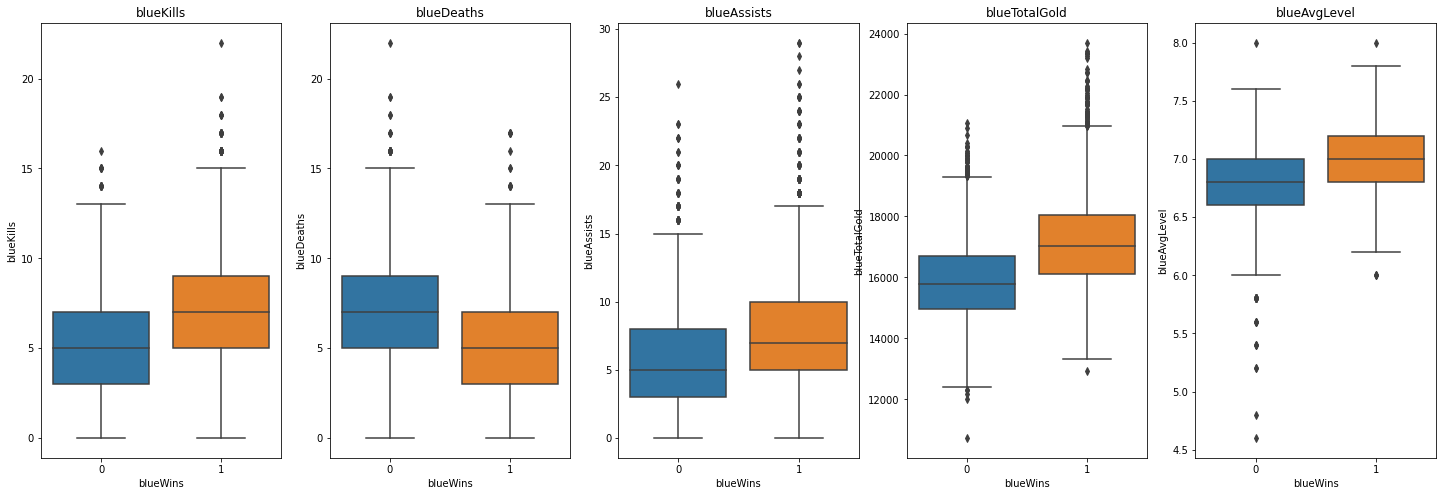

In [5]:
# grafik KDA tim dalam 10 menit pertama pertandingan
blue_status_player = ['blueKills', 'blueDeaths', 'blueAssists', 'blueTotalGold', 'blueAvgLevel']

plt.figure(figsize=(25, 8))
for ind, col in enumerate(blue_status_player):
    plt.subplot(1, 5, ind+1)
    sns.boxplot(data=lol_df, y=col, x='blueWins')
    plt.title(col)
plt.show()

Terlihat jelas, jika 10 menit pertama jumlah 'Kills', 'Assists', 'TotalGold', 'AvgLevel' tinggi dan 'Deaths' rendah, maka kemungkinan menang akan lebih tinggi.

Dalam permainan MOBA, di tingkat profesional, ada target objektif yang perlu didapatkan jika ingin memperbesar kemungkinan kemenangan. Beberapa target objektif tersebut ialah mengalahkan _Elite Monsters_ dan menghancurkan _tower_ musuh. Saya akan mencoba memvisualisasikan objektif tersebut dan ditambah dengan penempatan _wards_ dan penghancuran _wards_ lawan.

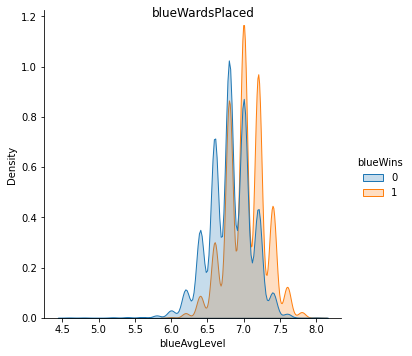

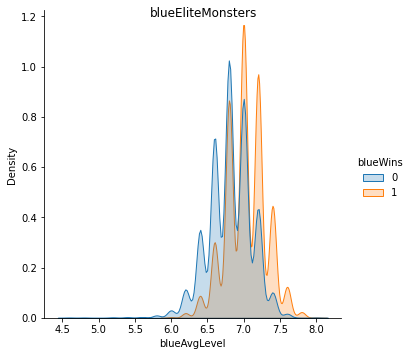

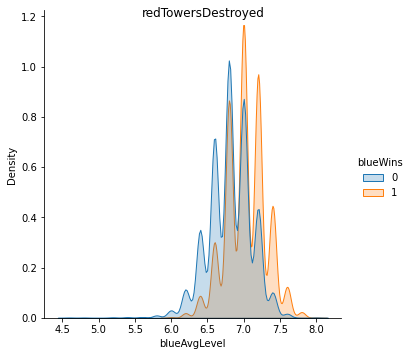

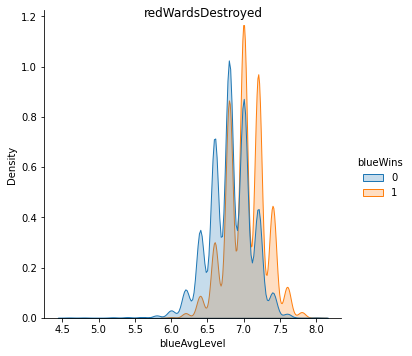

In [6]:
# grafik distribusi objektif tim
blue_objective_player = ['blueWardsPlaced', 'blueEliteMonsters', 'redTowersDestroyed', 'redWardsDestroyed']

for f in blue_objective_player:
    dp2 = sns.displot(lol_df, x=col, hue="blueWins", kind="kde", fill=True)
    dp2.fig.suptitle(f)
plt.show()

Iya, benar saja, jika dalam 10 menit pertama tim bisa mendapatkan target objektif maka kemungkinan kemenangan bisa didapatkan.

## Pra-pemrosesan Data

Dalam data ini kolom 'blueWins' menjadi label. Terlebih dahulu, cek apakah jumlah data tiap kelas dalam label seimbang atau tidak.

In [7]:
lol_df['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

Jumlah data seimbang, jadi bisa dilanjutkan pemisahan data train dan data test.

In [8]:
# menghitung jumlah nilai yang hilang
mv = lol_df.isna().sum()
mv[mv > 0]

Series([], dtype: int64)

Tidak ada nilai yang hilang pada data

In [9]:
X = lol_df.drop(['blueWins'], axis=1)
y = lol_df['blueWins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

print('Jumlah data train:', X_train.shape[0])
print('Jumlah data test:', X_test.shape[0])

Jumlah data train: 6915
Jumlah data test: 2964


### Seleksi Kolom

Kumpulan data ini merupakan informasi pertandingan antara dua tim, sehingga ada beberapa fitur yang memiliki kesamaan atau berlawanan nilai. Hal ini dapat diketahui dengan menghitung korelasi absolut antara fitur yang bernilai 1. Salah satu fitur yang saling berkolerasi akan dihapus.

In [10]:
# melihat nilai absolut korelasi bernilai 1
cor_df = {'columns': [], 'cor_value': []}
col_df = list(X_train.columns)

for col in X_train.columns:
    col_df.remove(col)
    for fea in col_df:
        if col != fea:
            corv = X_train[col].corr(X_train[fea])
            if abs(corv) >= 0.99:
                cor_df['columns'].append(col + ' - ' + fea)
                cor_df['cor_value'].append(corv)

cor_df = pd.DataFrame(data=cor_df, columns=['columns', 'cor_value'])
cor_df

,columns,cor_value
0,blueFirstBlood - redFirstBlood,-1.0
1,blueKills - redDeaths,1.0
2,blueDeaths - redKills,1.0
3,blueTotalGold - blueGoldPerMin,1.0
4,blueTotalMinionsKilled - blueCSPerMin,1.0
5,blueGoldDiff - redGoldDiff,-1.0
6,blueExperienceDiff - redExperienceDiff,-1.0
7,redTotalGold - redGoldPerMin,1.0
8,redTotalMinionsKilled - redCSPerMin,1.0


Selanjutnya, buang fitur yang memiliki absolut korelasi terhadap label di bawah 0,05.

In [11]:
# seleksi fitur berdasarkan korelasi terhadap label
train_data = pd.concat([X_train, y_train], axis=1)
corr = train_data.corr()['blueWins']
corr[abs(corr) < 0.05]

gameId                0.005094
blueWardsPlaced       0.002624
blueWardsDestroyed    0.049159
redWardsPlaced       -0.020922
redWardsDestroyed    -0.049494
Name: blueWins, dtype: float64

Beberapa pertimbangan lain dalam seleksi fitur:
- Di dalam permainan, _champion_ akan naik _level_ ketika _champion_ mencapai nilai _experience_ tertentu. Sehingga, fitur 'TotalExperience' sudah mewakili fitur 'AvgLevel, jadi fitur 'AvgLevel' akan dihapus.
- Fitur 'EliteMonsters' berisi nilai dari hasil penjumlahan fitur 'Dragons' dan 'Heralds', jadi fitur 'EliteMonsters' tidak dibutuhkan.
- Fitur 'gameId' tidak dibutuhkan dalam model.

In [12]:
drop_cols = ['redFirstBlood',
             'redDeaths',
             'blueDeaths',
             'blueGoldPerMin', 'redGoldPerMin',
             'blueCSPerMin', 'redCSPerMin',
             'blueGoldDiff', 'redGoldDiff',
             'blueExperienceDiff', 'redExperienceDiff',
             'blueWardsPlaced', 'blueWardsDestroyed',
             'redWardsPlaced', 'redWardsDestroyed',
             'blueAvgLevel', 'redAvgLevel',
             'blueEliteMonsters', 'redEliteMonsters',
             'gameId'
            ]
X_train_raw = X_train.drop(drop_cols, axis=1)

# membuat variabel yang berisi kolom yang digunakan dalam model
columns_used = list(X_train_raw.columns)

### Penanganan Pencilan

In [13]:
outliers_df = pd.DataFrame()

# melihat pencilan setiap kolom numerik
for col in X_train_raw:
    q1 = X_train_raw[col].quantile(0.25)
    q3 = X_train_raw[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    outliers = len(X_train_raw[(X_train_raw[col] < lower) | (X_train_raw[col] > upper)])
    if outliers > 0:
        outliers_df.loc[col, 'lower'] = lower
        outliers_df.loc[col, 'upper'] = upper
        outliers_df.loc[col, 'jumlah'] = outliers
        outliers_df.loc[col, 'persentase'] = outliers/len(X_train_raw) * 100

outliers_df.sort_values(['persentase'], ascending=False)

,lower,upper,jumlah,persentase
blueHeralds,0.00,0.00,1313.0,18.987708
redHeralds,0.00,0.00,1081.0,15.632683
blueTowersDestroyed,0.00,0.00,324.0,4.685466
redTowersDestroyed,0.00,0.00,273.0,3.947939
blueAssists,-3.50,16.50,146.0,2.111352
redAssists,-3.50,16.50,131.0,1.894432
blueTotalJungleMinionsKilled,26.00,74.00,116.0,1.677513
redTotalExperience,14890.00,21082.00,97.0,1.402748
redTotalJungleMinionsKilled,24.50,76.50,95.0,1.373825
blueTotalGold,12343.75,20517.75,80.0,1.156905


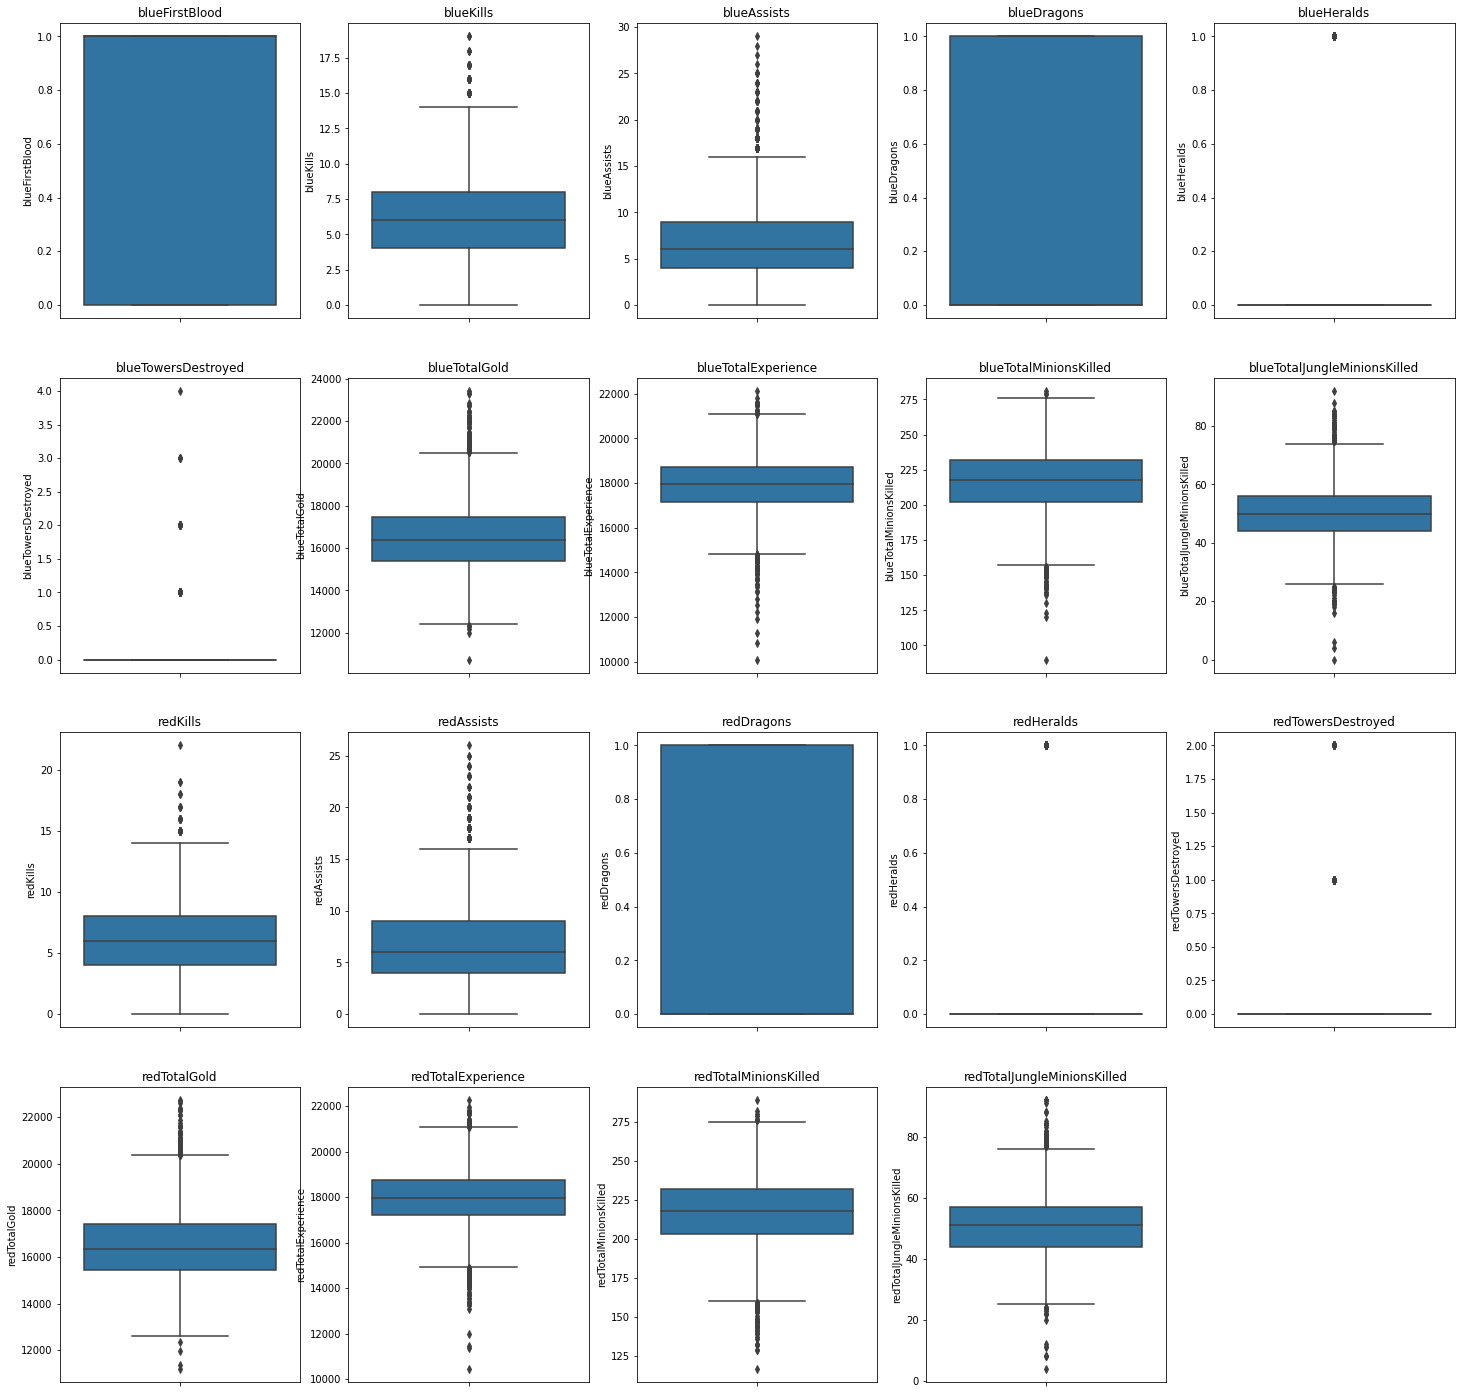

In [14]:
# melihat pencilan secara visual
row_chart = int(np.ceil(X_train_raw.shape[1] / 5))
plt.figure(figsize=(25, 25))
for ind, col in enumerate(X_train_raw):
    plt.subplot(row_chart, 5, ind+1)
    sns.boxplot(y=X_train_raw[col])
    plt.title(col)
plt.show()

Ada banyak fitur yang memiliki pencilan, tetapi hanya fitur 'blueHeralds' dan 'redHeralds' yang memiliki persentase pencilan lebih dari 5%. Kedua fitur tersebut hanya memiliki dua nilai unik (1 dan 0) sehingga bisa dikatakan fitur kategorik. Oleh karena alasan tersebut, saya membiarkan pencilan yang ada atau tidak melakukan penanganan apapun.

### _Feature Scaling_

In [15]:
# standarisasi
std_sc = StandardScaler()
std_sc.fit(X_train)

StandardScaler()

## Pendefinisian Model

In [16]:
# Logistic Regression
logr_pipe = Pipeline([
    ("selector", ColumnTransformer([("selector", "passthrough", columns_used)], remainder="drop")),
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(random_state=3))
])

# Support Vector Machines (SVM)
svm_pipe = Pipeline([
    ("selector", ColumnTransformer([("selector", "passthrough", columns_used)], remainder="drop")),
    ("scaler", StandardScaler()),
    ("svm", SVC(random_state=3))
    ])

# K-Nearest Neighbour (KNN)
knn_pipe = Pipeline([
    ("selector", ColumnTransformer([("selector", "passthrough", columns_used)], remainder="drop")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
    ])

# Decision Tree
dtc_pipe = Pipeline([
    ("selector", ColumnTransformer([("selector", "passthrough", columns_used)], remainder="drop")),
    ("scaler", StandardScaler()),
    ("dectree", DecisionTreeClassifier(random_state=3))
    ])

# Decision Tree
dtc_pipe = Pipeline([
    ("selector", ColumnTransformer([("selector", "passthrough", columns_used)], remainder="drop")),
    ("scaler", StandardScaler()),
    ("dectree", DecisionTreeClassifier(random_state=3))
    ])

# Random Forest
rfc_pipe = Pipeline([
    ("selector", ColumnTransformer([("selector", "passthrough", columns_used)], remainder="drop")),
    ("scaler", StandardScaler()),
    ("randfor", RandomForestClassifier(random_state=3))
    ])

# Naive Bayes
gnb_pipe = Pipeline([
    ("selector", ColumnTransformer([("selector", "passthrough", columns_used)], remainder="drop")),
    ("scaler", StandardScaler()),
    ("gausnb", GaussianNB())
    ])

# Ada Boost
adab_pipe = Pipeline([
    ("selector", ColumnTransformer([("selector", "passthrough", columns_used)], remainder="drop")),
    ("scaler", StandardScaler()),
    ("adaboost", AdaBoostClassifier(random_state=3))
    ])

# Gradient Boost
grab_pipe = Pipeline([
    ("selector", ColumnTransformer([("selector", "passthrough", columns_used)], remainder="drop")),
    ("scaler", StandardScaler()),
    ("gradboost", GradientBoostingClassifier(random_state=3))
    ])

## Pelatihan Model

In [17]:
# mempersiapkan dataframe yang berisi hasil pelatihan model
model_pipelines = [logr_pipe, svm_pipe, knn_pipe, dtc_pipe, rfc_pipe, gnb_pipe, adab_pipe, grab_pipe]
model_names = [
    'LogisticRegression',
    'SVC',
    'KNeighborsClassifier',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'GaussianNB',
    'AdaBoostClassifier',
    'GradientBoostingClassifier'
]
model_results = pd.DataFrame()

Pada studi kasus ini, model berusaha untuk memprediksi apakah tim biru dapat memenangkan pertandingan dengan melihat keadaan 10 menit pertama pertandingan. Ada dua tipe kesalahan prediksi dalam model yang mungkin terjadi. Kesalahan tipe pertama (FP/Type I Error), yaitu salah memprediksi tim biru menang padahal akan kalah. Kesalahan tipe kedua (FN/Type II Error), yaitu salah memprediksi tim biru kalah padahal akan menang. Dua kesalahan tersebut menghasilkan kerugian sama besar terhadap tim biru, sehingga penilaian kinerja model yang saya gunakan adalah skor F1. Data label juga seimbang, sehingga skor F1 cocok digunakan pada studi kasus ini.

In [18]:
# melatih model dan menampilkan waktu yang dibutuhkan setiap model
if len(model_pipelines) == len(model_names):
    for model, names in zip(model_pipelines, model_names):
        t = time()
        model.fit(X_train, y_train)
        ytrain_pred = model.predict(X_train) 
        ytest_pred = model.predict(X_test)
        model_results.loc[names, 'Akurasi Data Train'] = model.score(X_train, y_train)
        model_results.loc[names, 'Akurasi Data Test'] = model.score(X_test, y_test)
        model_results.loc[names, 'ROC AUC Data Train'] = roc_auc_score(y_train, ytrain_pred)
        model_results.loc[names, 'ROC AUC Data Test'] = roc_auc_score(y_test, ytest_pred)
        model_results.loc[names, 'Skor F1'] = f1_score(y_test, ytest_pred)
        print(names, '-', round(time() - t), 'detik')

LogisticRegression - 0 detik
SVC - 20 detik
KNeighborsClassifier - 22 detik
DecisionTreeClassifier - 0 detik
RandomForestClassifier - 6 detik
GaussianNB - 0 detik
AdaBoostClassifier - 2 detik
GradientBoostingClassifier - 6 detik


In [19]:
# hasil kinerja model
model_results = model_results.sort_values('Skor F1', ascending=False)
model_results

,Akurasi Data Train,Akurasi Data Test,ROC AUC Data Train,ROC AUC Data Test,Skor F1
LogisticRegression,0.736370,0.722335,0.736327,0.722472,0.718632
GradientBoostingClassifier,0.759219,0.721660,0.759230,0.721780,0.717756
GaussianNB,0.725813,0.722672,0.725900,0.722542,0.715964
AdaBoostClassifier,0.734635,0.718286,0.734623,0.718525,0.715696
SVC,0.762401,0.721323,0.762409,0.721174,0.714385
RandomForestClassifier,1.000000,0.713900,1.000000,0.713643,0.705556
KNeighborsClassifier,0.789443,0.680162,0.789505,0.680021,0.672652
DecisionTreeClassifier,1.000000,0.630229,1.000000,0.630315,0.625427


- Hasil kinerja antara model tidak jauh berbeda, yaitu sekitar 0.71. Hanya model Decision Tree dan KNeighbors yang memiliki nilai jauh lebih rendah dibanding model lainnya.
- Ada beberapa model yang _overfitting_: GradientBoostingClassifier, RandomForestClassifier, KNeighborsClassifier, dan DecisionTreeClassifier.

## Evaluasi Model

Oleh karena ada beberapa model yang _overfitting_, kinerja model diukur kembali menggunakan _cross validation_.

In [20]:
# menentukan skor yang digunakan pada cross validation
scoring = {'f1': make_scorer(f1_score),
           'acc': make_scorer(accuracy_score)}

In [21]:
# membuat dataframe yang berisi hasil cross validation
acc_colnames = ['Akurasi Fold ' + str(n+1) for n in range(5)] + ['Rata-Rata Akurasi']
f1_colnames = ['Skor F1 Fold ' + str(n+1) for n in range(5)] + ['Rata-Rata Skor F1']
cv_results = pd.DataFrame(columns=acc_colnames+f1_colnames)

# melatih kembali model dengan cross validation
for model, names in zip(model_pipelines, model_names):
    t = time()
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    n = 0
    for va, vf in zip(scores['test_acc'], scores['test_f1']):
        n += 1
        cv_results.loc[names, 'Akurasi Fold ' + str(n)] = va
        cv_results.loc[names, 'Rata-Rata Akurasi'] = round(np.mean(scores['test_acc']), 4)
        cv_results.loc[names, 'Skor F1 Fold ' + str(n)] = vf
        cv_results.loc[names, 'Rata-Rata Skor F1'] = round(np.mean(scores['test_f1']), 4)
    print(names, '-', round(time() - t), 'detik')

LogisticRegression - 1 detik
SVC - 26 detik
KNeighborsClassifier - 7 detik
DecisionTreeClassifier - 1 detik
RandomForestClassifier - 22 detik
GaussianNB - 0 detik
AdaBoostClassifier - 7 detik
GradientBoostingClassifier - 26 detik


In [22]:
# menampilkan hasil cross validation
cv_results = cv_results.sort_values('Rata-Rata Skor F1', ascending=False)
cv_results

,Akurasi Fold 1,Akurasi Fold 2,Akurasi Fold 3,Akurasi Fold 4,Akurasi Fold 5,Rata-Rata Akurasi,Skor F1 Fold 1,Skor F1 Fold 2,Skor F1 Fold 3,Skor F1 Fold 4,Skor F1 Fold 5,Rata-Rata Skor F1
LogisticRegression,0.739696,0.724512,0.73825,0.72162,0.737527,0.7323,0.74026,0.725702,0.747559,0.725196,0.735615,0.7349
SVC,0.736804,0.725235,0.731743,0.724512,0.740419,0.7317,0.73508,0.723837,0.742897,0.729979,0.73661,0.7337
GradientBoostingClassifier,0.738973,0.723789,0.733189,0.73102,0.723789,0.7302,0.736304,0.726361,0.739591,0.734286,0.717037,0.7307
RandomForestClassifier,0.727404,0.725235,0.728127,0.715835,0.722343,0.7238,0.723404,0.724238,0.733333,0.721868,0.718887,0.7243
GaussianNB,0.723066,0.71945,0.733912,0.715112,0.728127,0.7239,0.71776,0.715959,0.738265,0.716954,0.725547,0.7229
AdaBoostClassifier,0.72162,0.727404,0.723789,0.709328,0.717281,0.7199,0.718361,0.728582,0.729078,0.712034,0.712711,0.7202
KNeighborsClassifier,0.673174,0.690528,0.691974,0.682574,0.689805,0.6856,0.675753,0.692529,0.695714,0.685305,0.686633,0.6872
DecisionTreeClassifier,0.636298,0.642082,0.641359,0.64859,0.631236,0.6399,0.631502,0.647185,0.63901,0.65036,0.633621,0.6403


Selanjutnya, kinerja dari tiga model yang memiliki rata-rata skor F1 tertinggi pada tabel di atas akan coba ditingkatkan dengan menggunakan _tuning hyperparameter_.

### Tuning Hyperparameter

#### Logistic Regression

In [23]:
t = time()
param_grid = {
    'logreg__solver': ['liblinear', 'saga'],
    'logreg__penalty' : ['l1', 'l2'],
    'logreg__C': np.logspace(-4, 4, 9),
    'logreg__max_iter': [10, 100, 500, 1000, 2500]
}

grid_logr = GridSearchCV(logr_pipe, param_grid, cv=5, n_jobs=-1, scoring=scoring, refit='f1', return_train_score=True)
grid_logr.fit(X_train, y_train)
print('Logistic Regression')
print("Parameter terbaik:", grid_logr.best_params_)
print("Skor cross-validation terbaik:", grid_logr.best_score_)
logr_results = pd.DataFrame(grid_logr.cv_results_)
print(round(time() - t), 'detik')
logr_results = logr_results[['param_logreg__C', 'param_logreg__max_iter', 'param_logreg__penalty', 'param_logreg__solver',
                             'mean_train_acc', 'mean_test_acc', 'mean_test_f1']].sort_values('mean_test_f1', ascending=False)
logr_results.head(5)

Logistic Regression
Parameter terbaik: {'logreg__C': 0.01, 'logreg__max_iter': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}
Skor cross-validation terbaik: 0.7365798574572776
129 detik


,param_logreg__C,param_logreg__max_iter,param_logreg__penalty,param_logreg__solver,mean_train_acc,mean_test_acc,mean_test_f1
45,0.01,100,l1,saga,0.734490,0.734056,0.736580
49,0.01,500,l1,saga,0.734490,0.734056,0.736580
57,0.01,2500,l1,saga,0.734490,0.734056,0.736580
53,0.01,1000,l1,saga,0.734490,0.734056,0.736580
41,0.01,10,l1,saga,0.734526,0.733912,0.736397


Ada empat kombinasi parameter yang menghasilkan skor F1 tertinggi. Semua nilai parameter sama kecuali max_iter. Ini berarti max_iter tidak berpengaruh terhadap peningkatan model, kecuali saat max_iter bernilai 10 skor F1 turun. Jadi, kombinasi **parameter terbaik untuk model Logistic Regression ini adalah C bernilai 0,01, max_iter di antara 100-2500, penalty l1, dan solver saga**.

#### Support Vector Machine
Khusus model ini saya gunakan RandomizedSearchCV terlebih dahulu karena proses model ini cukup lama.

In [24]:
t = time()
param_rand = {
    'svm__kernel': ["linear", "poly", "rbf"],
    'svm__C': np.logspace(-3,1,5),
    'svm__gamma': np.logspace(-3,1,5)
}

rand_svm = RandomizedSearchCV(svm_pipe, param_rand, cv=5, n_jobs=-1, scoring=scoring, refit='f1', return_train_score=True)
rand_svm.fit(X_train, y_train)
print('Support Vector Machine')
print("Parameter terbaik:", rand_svm.best_params_)
print("Skor cross-validation terbaik:", rand_svm.best_score_)
svm_randresults = pd.DataFrame(rand_svm.cv_results_)
print(round(time() - t), 'detik')
svm_randresults = svm_randresults[['param_svm__kernel', 'param_svm__gamma', 'param_svm__C',
                                   'mean_train_acc', 'mean_test_acc', 'mean_test_f1']].sort_values('mean_test_f1',
                                                                                                   ascending=False)
svm_randresults.head(5)

Support Vector Machine
Parameter terbaik: {'svm__kernel': 'linear', 'svm__gamma': 1.0, 'svm__C': 0.1}
Skor cross-validation terbaik: 0.7341824846545703
178 detik


,param_svm__kernel,param_svm__gamma,param_svm__C,mean_train_acc,mean_test_acc,mean_test_f1
7,linear,1.0,0.1,0.736045,0.732176,0.734182
9,linear,0.01,0.1,0.736045,0.732176,0.734182
1,linear,10.0,0.01,0.734996,0.732321,0.733289
0,linear,0.1,1.0,0.736153,0.731164,0.733065
5,linear,0.01,1.0,0.736153,0.731164,0.733065


**Parameter terbaik untuk model Support Vector Machine adalah kernel rbf, gamma bernilai 0.001, dan C bernilai 10**.

Dari hasil Randomized Search ini, saya tidak melanjutkan ke proses Grid Search karena peningkatan akurasi dan skor F1 hanya sedikit.

#### Gradient Boosting

In [25]:
t = time()
param_grid = {
    'gradboost__n_estimators': [10, 50, 100, 200],
    'gradboost__learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0, 0.2, 0.5]
}

grid_grb = GridSearchCV(grab_pipe, param_grid, cv=5, n_jobs=-1, scoring=scoring, refit='f1', return_train_score=True)
grid_grb.fit(X_train, y_train)
print('Gradient Boosting Classifier')
print("Parameter terbaik:", grid_grb.best_params_)
print("Skor cross-validation terbaik:", grid_grb.best_score_)
grb_results = pd.DataFrame(grid_grb.cv_results_)
print(round(time() - t), 'detik')
grb_results = grb_results[['param_gradboost__learning_rate', 'param_gradboost__n_estimators',
                           'mean_train_acc', 'mean_test_acc', 'mean_test_f1']].sort_values('mean_test_f1', ascending=False)
grb_results.head(5)

Gradient Boosting Classifier
Parameter terbaik: {'gradboost__learning_rate': 0.01, 'gradboost__n_estimators': 200}
Skor cross-validation terbaik: 0.733658454666317
316 detik


,param_gradboost__learning_rate,param_gradboost__n_estimators,mean_train_acc,mean_test_acc,mean_test_f1
11,0.01,200,0.745806,0.732610,0.733658
13,0.1,50,0.753290,0.732899,0.733501
12,0.1,10,0.739516,0.729429,0.731605
3,0.0001,200,0.680875,0.676790,0.731570
14,0.1,100,0.764787,0.730152,0.730716


**Parameter terbaik untuk model Gradient Boosting adalah learning rate bernilai 0,01, dan n_estimators bernilai 200**.

**Kesimpulan dari tuning hyperparameter**
Dari hasil _tuning hyperparameter_, peningkatan skor F1 dari seluruh model tidak begitu naik signifikan. Model yang memiliki Skor F1 tertinggi adalah Logistic Regression dengan nilai 0,7366.

Saya ingin mencoba melihat kinerja model Logistic Regression dengan parameter terbaik ini lebih detail.

In [26]:
# fungsi untuk membuat confusion matrix
def conf_matrix(model_names, y_test, y_pred):
    plt.figure(figsize=(6, 6))
    plt.title(f'Confusion Matrix of {model_names}')
    ax = plt.subplot()
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g', cmap=plt.cm.Blues)
    ax.set_xlabel('Label Prediksi')
    ax.set_ylabel('Label Aktual')
    plt.show()

In [27]:
# memasukkan parameter terbaik ke model logistic regression
best_params = grid_logr.best_params_
logr_pipe.set_params(**best_params)
logr_pipe.fit(X_train, y_train)
yb_pred = logr_pipe.predict(X_test)

In [28]:
# mengecek parameter yang telah dimasukkan
logr_pipe.named_steps['logreg']

LogisticRegression(C=0.01, penalty='l1', random_state=3, solver='saga')

----------   Logistic Regression   ----------


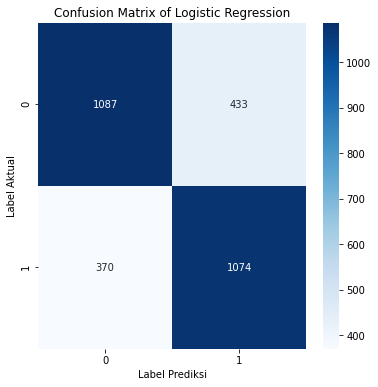

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1520
           1       0.71      0.74      0.73      1444

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964



In [29]:
# membuat confusion matrix dan classification report
names = "Logistic Regression"

print(f'----------   {names}   ----------')
conf_matrix(names, y_test, yb_pred)
print('Classification Report')
print(classification_report(y_test, yb_pred))

In [30]:
print('Akurasi Data Train:', round(logr_pipe.score(X_train, y_train), 4))
print('Akurasi Data Test:', round(logr_pipe.score(X_test, y_test), 4))
print('Skor F1:', round(f1_score(y_test, yb_pred), 4))

Akurasi Data Train: 0.7329
Akurasi Data Test: 0.7291
Skor F1: 0.7279


## Penyimpanan Model

Model terbaik disimpan dalam file pickle.

In [33]:
# membuat pickle untuk website
with open('best_param_model.pkl', 'wb') as model_file:
    pickle.dump(logr_pipe, model_file)

## Inferensi Model

In [31]:
# membuat data dummy
inf_df = pd.DataFrame(columns=lol_df.columns)

# membuat nilai random dari sebaran data dari data mentah
for col in lol_df.columns:
    inf_df[col] = lol_df[col].sample(3).values

inf_df.drop(['blueWins'], axis=1, inplace=True)
inf_df

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4296004784,14,1,1,11,7,6,0,1,0,...,0,17171,7.0,17969,200,51,1012,-1796,26.3,2095.5
1,4522858842,19,0,0,7,4,12,0,1,0,...,0,17300,6.6,19304,187,50,2055,1850,18.4,1531.9
2,4502187260,15,6,1,9,10,4,0,0,0,...,0,16667,7.4,17911,224,36,1325,1275,24.7,1751.3


In [32]:
# memprediksi data dummy
yinf_pred = logr_pipe.predict(inf_df)
yinf_pred = np.where(yinf_pred == 0, 'LOSE', 'WIN')
inf_df['y_prediction'] = yinf_pred
inf_df

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,y_prediction
0,4296004784,14,1,1,11,7,6,0,1,0,...,17171,7.0,17969,200,51,1012,-1796,26.3,2095.5,LOSE
1,4522858842,19,0,0,7,4,12,0,1,0,...,17300,6.6,19304,187,50,2055,1850,18.4,1531.9,LOSE
2,4502187260,15,6,1,9,10,4,0,0,0,...,16667,7.4,17911,224,36,1325,1275,24.7,1751.3,WIN


Dari kondisi pertandingan 10 menit pertama di atas, model Logistic Regression memprediksi hasil kemenangan tim biru pada kolom 'blueWins'.

## Kesimpulan

- Dataset berisi kondisi masing-masing dari dua tim dalam pertandingan, sehingga ada beberapa kolom yang memiliki informasi yang mirip. Antara kolom/fitur juga memiliki kolerasi yang kuat antara fitur. Sehingga, beberapa kolom perlu dihilangkan.
- Model yang digunakan dalam studi kasus ini adalah
    - _Logistic Regression_,
    - _Support Vector Machine_,
    - _KNeighbors_,
    - _Decision Tree_,
    - _Random Forest_,
    - _Gaussian Naive Bayes_,
    - _Ada Boost_, dan 
    - _Gradient Boosting_.  
- Hasil kinerja semua model tidak jauh berbeda, yaitu skor F1 sekitar 0.71. Hanya model Decision Tree dan KNeighbors yang memiliki skor F1 jauh lebih rendah dibanding model lainnya, yaitu masing-masing 0,67 dan 0,63.
- Oleh karena, ada beberapa model yang _overfitting_, saya mencoba mengukur kembali kinerja model dengan _cross validation_. Dari _cross validation_, saya dapatkan model dengan skor F1 tertinggi berturut-turut ialah _Logistic Regression_,  _Support Vector Machine_, dan _Gradient Boosting_.
- Kinerja tiga model terbaik coba ditingkatkan dengan _tuning hyperparameter_, tetapi skor F1 hanya meningkat sedikit. Pada akhirnya, model yang memiliki skor F1 tertinggi adalah Logistic Regression dengan nilai 0,7366.